In [1]:
import numpy as np
import torch
import igl
import time
import matplotlib.pyplot as plt

import nbimporter
from MyLinearHarmonic import myLinearHarmonic
from MyGradientHarmonic import myGradHarmonic, myBetterGradHarmonic

import os
root_folder = os.getcwd()

In [4]:
v, f = igl.read_triangle_mesh(os.path.join(root_folder, "decimated-max.obj"))
v[:,[0, 2]] = v[:,[2, 0]] # Swap X and Z axes
u = v.copy()

s = igl.read_dmat(os.path.join(root_folder,"decimated-max-selection.dmat"))
b = np.array([[t[0] for t in [(i, s[i]) for i in range(0, v.shape[0])] if t[1] >= 0]]).T

## Boundary conditions directly on deformed positions
u_bc = np.zeros((b.shape[0], v.shape[1]))
v_bc = np.zeros((b.shape[0], v.shape[1]))

for bi in range(b.shape[0]):
    v_bc[bi] = v[b[bi]]

    if s[b[bi]] == 0: # Don't move handle 0
        u_bc[bi] = v[b[bi]]
    elif s[b[bi]] == 1: # Move handle 1 down
        u_bc[bi] = v[b[bi]] + np.array([[0, -100, 0]])
    else: # Move other handles forward
        u_bc[bi] = v[b[bi]] + np.array([[-55, 0, 0]])
d_bc = u_bc - v_bc

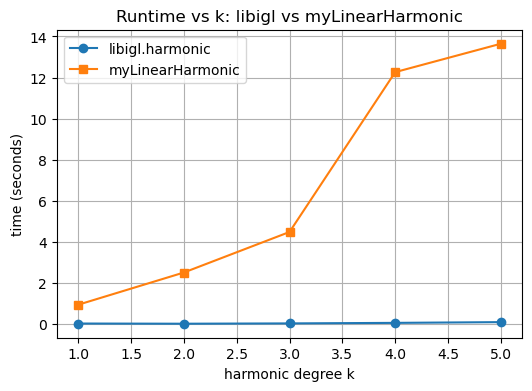

In [11]:
#plot libigl and myLinearHarmonic
ks = list(range(1,6))
times_l = []
times_m = []
for i in range(5):
    t0 = time.perf_counter()
    igl.harmonic(v, f, b, d_bc, i+1)
    times_l.append(time.perf_counter() - t0)
    t1 = time.perf_counter()
    myLinearHarmonic(v, f, b, d_bc, i+1)
    times_m.append(time.perf_counter() - t1)
    
#plot
plt.figure(figsize=(6,4))
plt.plot(ks, times_l, marker='o', label='libigl.harmonic')
plt.plot(ks, times_m, marker='s', label='myLinearHarmonic')
plt.xlabel("harmonic degree k")
plt.ylabel("time (seconds)")
plt.title("Runtime vs k: libigl vs myLinearHarmonic")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
t0 = time.perf_counter()
myGradHarmonic(v, f, b, d_bc, 1)
print(time.perf_counter() - t0)

69.34464133298025


In [5]:
t0 = time.perf_counter()
myBetterGradHarmonic(v, f, b, d_bc, 1)
print(time.perf_counter() - t0)

/Users/carsonstanton-sharpless/anaconda3/lib/python3.11/site-packages/torch/utils/_device.py:104: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:257.)
  return func(*args, **kwargs)


67.31160145788454
